In [2]:
import urllib
import requests
import numpy
import pandas as pd
import os

In [3]:
from lxml import html
from bs4 import BeautifulSoup
import csv

#get the web data
page = requests.get('https://www.wikiart.org/en/claude-monet/all-works/text-list')

#get the structure
page_data = BeautifulSoup(page.text,"lxml")


names = page_data.find_all("li",attrs={"class":"painting-list-text-row"})
names_list=[]
name_list=[]
year_list=[]
for h in names:
                name_list.append(h.find("a").contents[0])
                names_list.append(h.find("a").contents[0].lower().replace(" ", "-").replace(",","-").replace("\xa0","-").replace('(',"").replace(")","").replace(".","").replace("'","-").replace("`","-").replace(";","").replace("?","").replace("’","-"))
                year_list.append(h.find("span").contents[0].replace(",","").replace(" ","")) 

In [3]:
for i in range(len(names_list)):
    names_list[i]=names_list[i].replace("---","-")
  

In [4]:
for i in range(len(names_list)):
    names_list[i]=names_list[i].replace("--","-")

In [ ]:
for i in range(len(names_list)):
    if names_list[i][-1]=="-":
         names_list[i][-1]=""

In [5]:
#save the image
for i in range(len(names_list)):
        title="monet_images/{}.jpg".format(names_list[i])
        url= "https://uploads0.wikiart.org/images/claude-monet/{}.jpg!Large.jpg".format(names_list[i])
        im=requests.get(url,stream = True)
        if im.status_code != 404:
            f = open(title, 'wb')
            f.write(im.content)
            f.close()
        elif im.status_code == 404:
            namess=names_list[i]+"-"+year_list[i]
            url2= "https://uploads0.wikiart.org/images/claude-monet/{}.jpg!Large.jpg".format(namess)
            im2=requests.get(url2,stream = True)
            if im2.status_code != 404:
                f = open(title, 'wb')
                f.write(im2.content)
                f.close()
            else:
                namesss=names_list[i]+"(1)"
                url3= "https://uploads0.wikiart.org/images/claude-monet/{}.jpg!Large.jpg".format(namesss)
                im3=requests.get(url3,stream = True)
                if im3.status_code != 404:
                    f = open(title, 'wb')
                    f.write(im3.content)
                    f.close()
                else:    
                    namessss=names_list[i]+"-"+year_list[i]+"(1)"
                    url4= "https://uploads0.wikiart.org/images/claude-monet/{}.jpg!Large.jpg".format(namessss)
                    im4=requests.get(url4,stream = True)
                    if im4.status_code != 404:
                        f = open(title, 'wb')
                        f.write(im4.content)
                        f.close()
                    else:   
                        url5= "https://uploads0.wikiart.org/images/claude-monet/{}.jpg".format(names_list[i])
                        im5=requests.get(url5,stream = True)
                        if im5.status_code != 404:
                            f = open(title, 'wb')
                            f.write(im5.content)
                            f.close()
                        else:
                            print("Following image failed to download:")
                            print("-------------------------")
                            print(namess) 
                            print(names_list[i])
           

the-beach-at-honfleur
on-the-bank-of-the-seine-bennecourt
houses-on-the-achterzaan
pleasure-boats-argenteuil-c1872-3-oil-on-canvas
the-seine-at-asnieres
the-seine-at-asnieres
the-havre-the-trade-bassin
argenteuil-bridge
camille-monet-and-a-child-in-the-artist-s-garden-in-argenteuil
roses-in-the-hoshedes-garden-at-montregon
jean-pierre-hoschede-called-bebe-jean-
the-road-to-vertheuil-snow-effect
landscape-with-thunderstorm-vetheuil-1880
sunset-at-pourville
fishermans-house-in-petit-ailly
the-customs-house
port-daval-rough-sea
mer-agitée-à-étretat
etretat-cliff-of-daval-sunset
the-rocks-of-belle-ile
at-the-meadow-vetheuil
torrent-of-the-petite-creuse-at-fresselines
general-view-of-rouen-from-stcatherines-bank
rouen-cathedral-red-sunlight
rouen-cathedral-the-portal-and-the-tower-dallban-on-the-sun
rouen-cathedralthe-gate-grey-weather
rouen-cathedral-morning-white-harmony
irises-in-monet-s-garden
london-parlement
rio-della-salute
port-daval
the-village-of-vétheuil


In [18]:
#manually save some image
from PIL import Image

def save_img(url, name):
    img = Image.open(requests.get("https://uploads4.wikiart.org/images/claude-monet/{}".format(url), stream = True).raw)
    img.save("monet_images/{}.jpg".format(name))
    return img

## manually saved some img 
the-beach-at-honfleux<br/>
not_detected_212144.jpg!HalfHD.jpg<br/>
zaandam-1<br/>
pleasure-boats-argenteuil-c-1872-3-oil-on-canvas<br/>
the-seine-at-asnieres-02<br/>
the-seine-at-asnieres-03<br/>
the-havre-the-bassin-trade<br/>
not_detected_212148<br/>
madame-monet-and-child(1)<br/>
roses-in-the-hoshede-s-garden-at-montregon<br/>
jean-pierre-hoschede-called-bebe-jean<br/>
the-road-to-vetheuil-snow-effect<br/>
landscape-with-thunderstorm<br/>
sunset-at-pourville-1<br/>
fisherman-s-house-in-petit-ailly
the-custom-s-house<br/>
port-d-aval-rough-sea<br/>
not_detected_212140<br/>
etretat-cliff-of-d-aval-sunset<br/>
the-rocks-of-belle-lle<br/>
at-the-meadow-vetheuil-1888<br/>
torrent-of-the-petite-creuse-at-freeselines<br/>
general-view-of-rouen-from-st-catherines-bank<br/>
rouen-cathedral-red-sunlight<br/>
klod-mone-ruanska-katedrala-1892/<br/>
rouen-cathedral-the-portal-and-the-tower-d-allban-on-the-sun<br/>
rouen-cathedral-the-gate-grey-weather<br/>
rouen-cathedral-0<br/>
irises-in-monet-s-garden-03<br/>
not_detected_212152(1)<br/>
rio-della-salute-03<br/>
port-d-aval<br/>
the-village-of-vetheuil.jpg<br/>


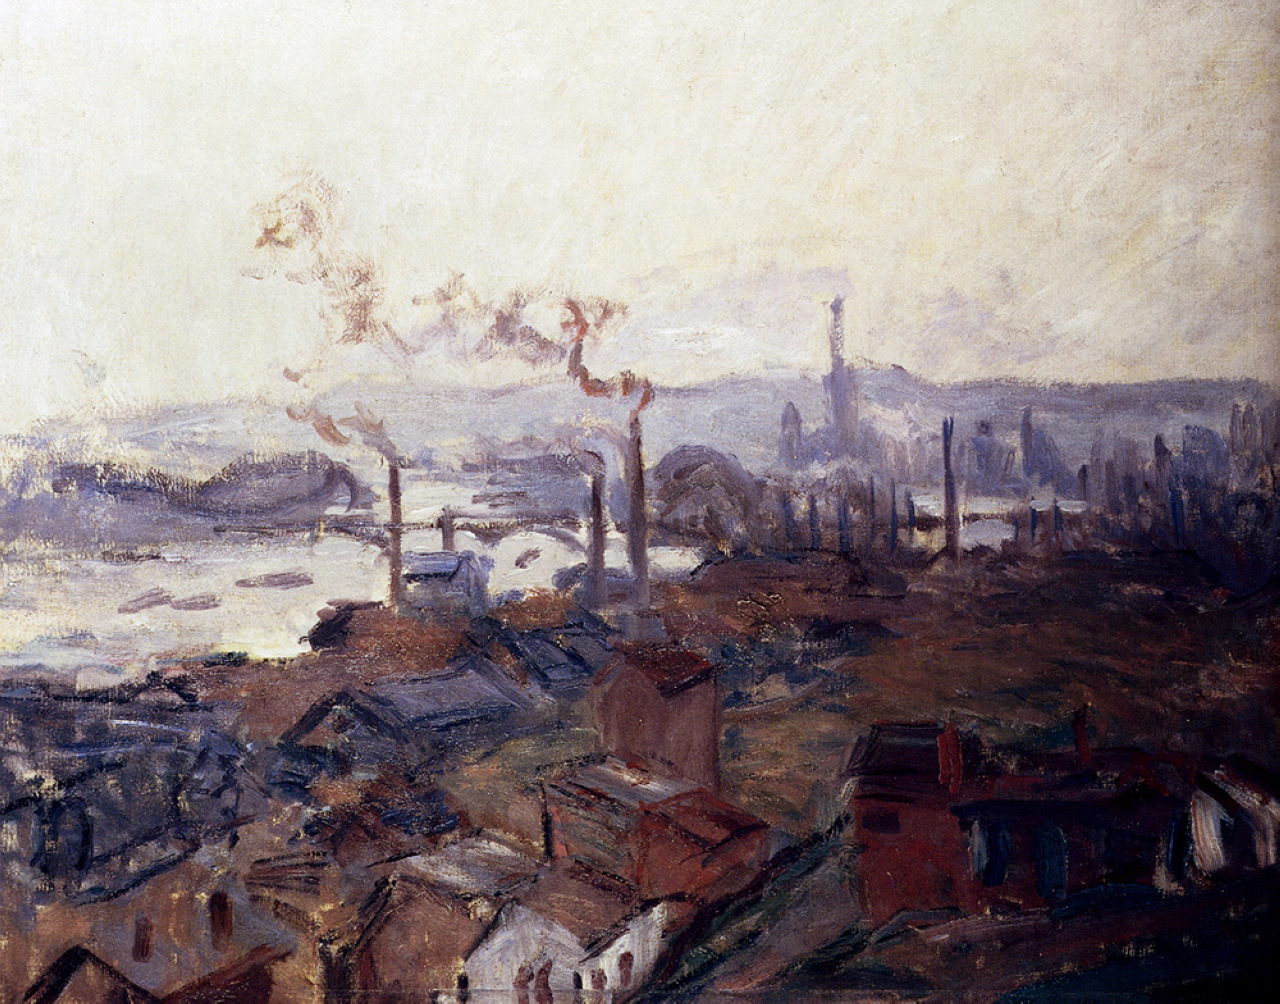

In [89]:
save_img("general-view-of-rouen-from-st-catherines-bank.jpg", "general-view-of-rouen-from-st-catherines-bank")

In [6]:
import collections 
year_count=collections.Counter(year_list)

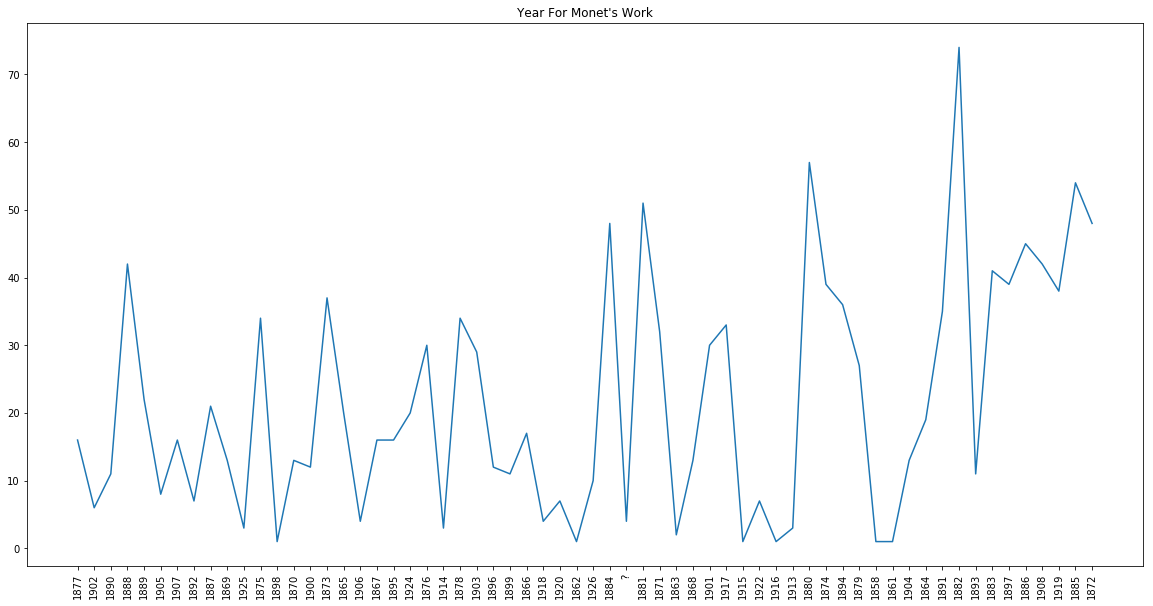

In [23]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
x = np.arange(62)
plt.plot(x,list(year_count.values()))
plt.xticks(x, year_count.keys(), rotation=90)
plt.title("Year For Monet's Work")
plt.show()

In [14]:
monets=os.listdir('monet_images')
molist=[ m.replace(".jpg","") for m in monets]

In [16]:

#get genre
genre_list=[]
for e in range(len(molist)):
    page2 = requests.get('https://www.wikiart.org/en/claude-monet/{}'.format(molist[e]))
    if page2.status_code!=404:
        page2_data = BeautifulSoup(page2.text,"lxml")
        genre = page2_data.find_all("span",attrs={"itemprop":"genre"})
        for h in genre:
             genre_list.append(h.contents[0])
             #print (h.contents[0])
    else:
        print("Did not find the link for {}".format(molist[e]))
        

Did not find the link for gennevilliers-plain
Did not find the link for self-portrait
Did not find the link for meadows-in-giverny
Did not find the link for water-lilies-green-reflection-left-half
Did not find the link for the-japanese-bridge-5
Did not find the link for haystacks-at-sunset-frosty-weather
Did not find the link for rising-tide-at-pourville
Did not find the link for waterloo-bridge-hazy-sunshine
Did not find the link for bathers-at-la-grenouillere
Did not find the link for iris-at-the-sea-rose-pond
Did not find the link for garden-in-bordighera-impression-of-morning
Did not find the link for water-lilies-and-agapanthus
Did not find the link for on-the-bank-of-the-seine-bennecourt
Did not find the link for vetheuil-barge-on-the-seine
Did not find the link for wisteria-left-half
Did not find the link for the-bridge-under-repair
Did not find the link for the-three-trees-autumn
Did not find the link for path-under-the-rose-arches-giverny
Did not find the link for the-grand-do

Did not find the link for rouen-cathedral-evening-harmony-in-brown
Did not find the link for the-artist-s-house-from-the-rose-garden
Did not find the link for carrieres-saint-denis
Did not find the link for snow-effect-with-setting-sun
Did not find the link for islands-at-port-villez
Did not find the link for at-the-meadow-vetheuil
Did not find the link for haystacks-at-chailly
Did not find the link for wisteria
Did not find the link for giverny-in-springtime
Did not find the link for water-lilies-green-reflection-right-half
Did not find the link for rocks-at-port-coton-the-lion-rock
Did not find the link for irises-2
Did not find the link for water-lilies-nympheas
Did not find the link for meditation-madame-monet-sitting-on-a-sofa
Did not find the link for water-lilies-reflections-of-weeping-willows-left-half
Did not find the link for yellow-irises-and-malva
Did not find the link for london-parlement
Did not find the link for irises
Did not find the link for seine-at-asnieres
Did not 

In [26]:
glist=collections.Counter(genre_list)

In [28]:
glist

Counter({'animal painting': 2,
         'cityscape': 182,
         'flower painting': 31,
         'genre painting': 52,
         'landscape': 580,
         'marina': 29,
         'portrait': 28,
         'self-portrait': 3,
         'still life': 15})

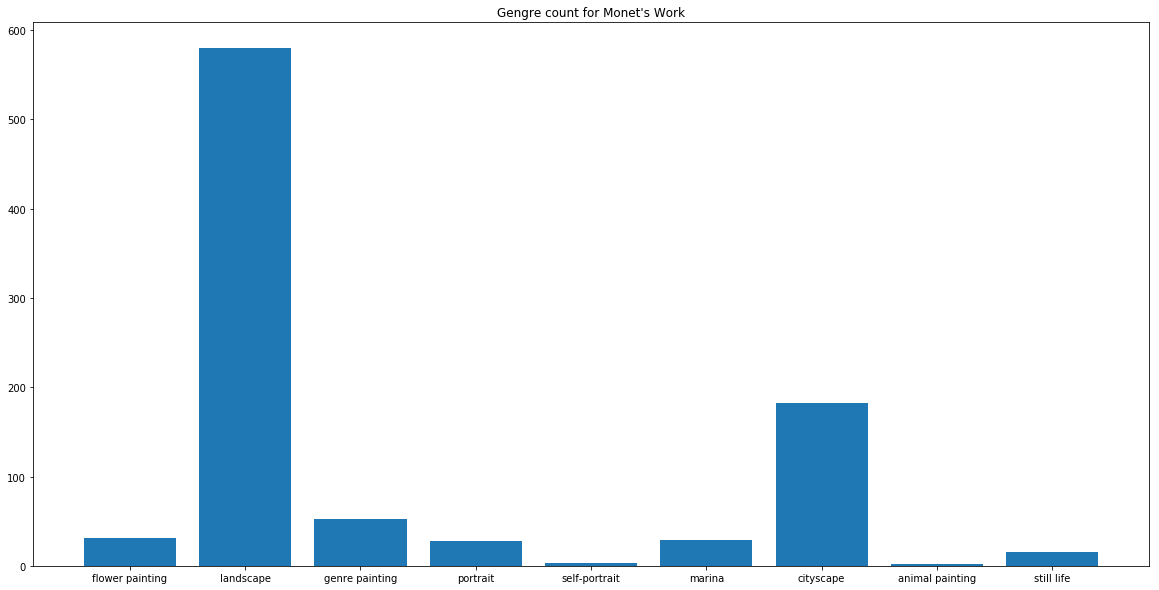

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
x = np.arange(9)
plt.bar(x,list(glist.values()))
plt.xticks(x, glist.keys())
plt.title("Gengre count for Monet's Work")
plt.show()